### Objective : Image classification based on Vision Transformer
1. Develop an image classification model using the Vision Transformer (ViT) architecture without relying on pre-implemented transformer or self-attention modules such as torch.nn.Transformer or torch.nn.MultiheadAttention.
2. Conduct a performance comparison of the ViT-based model against a Convolutional Neural Network (CNN)-based model across multiple criteria.
3. Prepare a 10-20 minute PowerPoint presentation to present the objective, methodology, and results of your AI model. Please include code when explaining the ViT model implementation.
4.If you have any questions or encounter problems during the project, please contact jinhyun@quantamatrix.com

### Dataset : ILSVRC2012
* ILSVRC2012 dataset spans 1000 object classes and contains 1,281,167 training images and 50,000 validation images.
* Download link : https://drive.google.com/file/d/1bDiLK4JUy_n2LK8SkMqQPKq2s280lBps/view?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import os
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import torchvision
import torchvision.transforms as transforms

from ImageNet_utils import clsidx_to_labels

C:\Users\Jinhyun Kim\.conda\envs\torch1.12\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using {device} device")

Using cuda device


In [4]:
DATASET_PATH = os.path.join("dataset", "ILSVRC2012")

In [5]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
#     normalize,
    ])

In [6]:
train_dataset = torchvision.datasets.ImageNet(root= DATASET_PATH, 
                                              transform=transform, 
                                              split='train')
val_dataset = torchvision.datasets.ImageNet(root= DATASET_PATH, 
                                            transform=transform, 
                                            split='val')    

In [7]:
BATCH_SIZE = 64
num_workers = 4

In [8]:
train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=num_workers,
)
val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=num_workers,
)

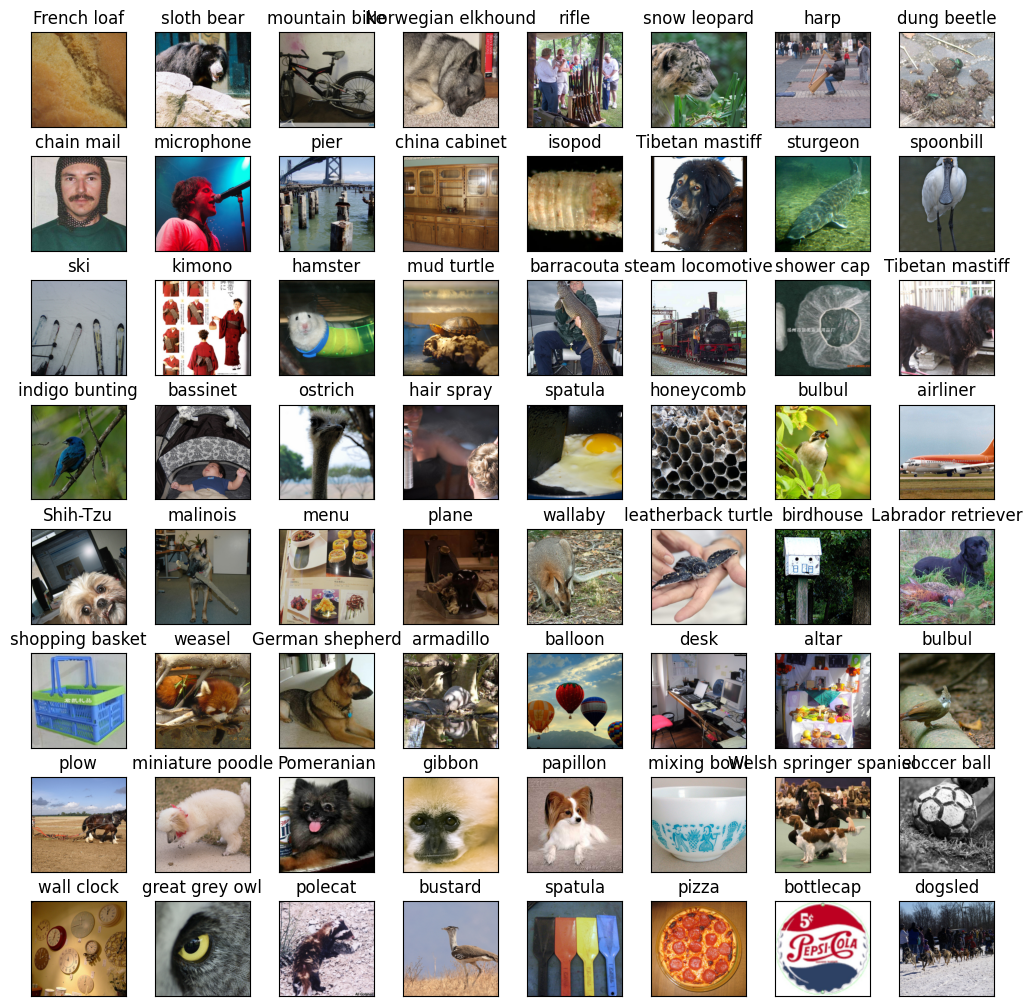

In [9]:
import matplotlib.pyplot as plt

xb, yb = next(iter(train_loader))

row_num, col_num = int(BATCH_SIZE/8), 8
fig, axs = plt.subplots(row_num, col_num, figsize=(10, 10 * row_num/col_num))

for row_idx in range(row_num):
    for col_idx in range(col_num):
        ax = axs[row_idx][col_idx]
        i = col_idx * row_num + row_idx
        
        class_index = yb[i].item()
        class_label = clsidx_to_labels[class_index].split(",")[0]
        img = xb[i].permute(1,2,0)
        ax.title.set_text(class_label)
        ax.set_yticks([])
        ax.set_xticks([])
        ax.imshow(img)
plt.tight_layout(pad=0.5)
plt.show()